# Import Libraries

In [5]:
import csv 
import pandas as pd 
from tabulate import tabulate

# Define Constants 
These can be extracted from the csv data as well to make the code a bit more generic. But, in my opinion it's just unnecessary computational overhead.

In [8]:
ETHNICITIES = ['Hispanic', 'Caucasian', 'African American', 'Asian', 'Other']
TUMOR_LOCATIONS = ['Lower Lobe', 'Middle Lobe', 'Upper Lobe']

# Ask User for File Name

In [11]:
file_name = input("Enter File Name: ")

Enter File Name:  lung_data.csv


# Task A

## Import Lung Cancer Data using reader() function

In [15]:
records=[]

try:
    with open(file_name, encoding="utf-8") as csv_file:
        reader=csv.reader(csv_file)
        headings=next(csv_file)
        for line in reader:
            records.append(line)
except FileNotFoundError as e:
    print(f"File Not Found {e}")

In [17]:
# 0 Patient_ID
# 1 Age
# 2 Gender
# 3 Smoking_History
# 4 Tumor_Size_mm
# 5 Tumor_Location
# 6 Stage
# 7 Treatment
# 8 Survival_Months
# 9 Ethnicity
# 10 Insurance_Type
# 11 Family_History
# 12 Comorbidity_Diabetes
# 13 Comorbidity_Hypertension
# 14 Comorbidity_Heart_Disease
# 15 Comorbidity_Chronic_Lung_Disease
# 16 Comorbidity_Kidney_Disease
# 17 Comorbidity_Autoimmune_Disease
# 18 Comorbidity_Other
# 19 Performance_Status
# 20 Blood_Pressure_Systolic
# 21 Blood_Pressure_Diastolic
# 22 Blood_Pressure_Pulse
# 23 Haemoglobin_Level
# 24 White_Blood_Cell_Count
# 25 Platelet_Count
# 26 Albumin_Level
# 27 Alkaline_Phosphatase_Level
# 28 Alanine_Aminotransferase_Level
# 29 Aspartate_Aminotransferase_Level
# 30 Creatinine_Level
# 31 LDH_Level
# 32 Calcium_Level
# 33 Phosphorus_Level
# 34 Glucose_Level
# 35 Potassium_Level
# 36 Sodium_Level
# 37 Smoking_Pack_Years

## A1

In [20]:
from task_a import retrieve_demographic_information

patient_id=int(input("Please Enter Patient ID: "))
demographic_information = retrieve_demographic_information(patient_id, records)

if demographic_information:
    print(tabulate([demographic_information], headers="keys", tablefmt="pretty"))
else:
    print("Patient id not found!")

Please Enter Patient ID:  13117


+-----+--------+-----------------+-----------+
| Age | Gender | Smoking_History | Ethnicity |
+-----+--------+-----------------+-----------+
| 68  |  Male  | Current Smoker  | Hispanic  |
+-----+--------+-----------------+-----------+


## A2

In [23]:
from task_a import retrieve_medical_history

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    medical_history_records = retrieve_medical_history(ETHNICITIES[user_input-1], records)
    print(tabulate(medical_history_records, headers="keys", tablefmt="pretty"))
else:
    print("Invalid option!")
    

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  1


+------------+----------------+----------------------+----------------------------+-------------------+
| Patient_ID | Family_History | Comorbidity_Diabetes | Comorbidity_Kidney_Disease | Haemoglobin_Level |
+------------+----------------+----------------------+----------------------------+-------------------+
|   13117    |       No       |         Yes          |            Yes             |       13.54       |
|   16835    |      Yes       |          No          |             No             |       15.93       |
|   13757    |      Yes       |          No          |            Yes             |       10.95       |
|   54773    |      Yes       |         Yes          |            Yes             |       15.28       |
|   16377    |       No       |         Yes          |             No             |       10.19       |
|   20801    |       No       |          No          |             No             |       15.37       |
|   49335    |       No       |          No          |          

## A3

In [25]:
from task_a import retrieve_treatment_details

treatment_detail_records = retrieve_treatment_details(records)
print(tabulate(treatment_detail_records, headers="keys", tablefmt="pretty"))

+------------+-----------------+---------------+----------------+-----------+
| Patient_ID | Survival_Months | Tumor_Size_mm | Tumor_Location |   Stage   |
+------------+-----------------+---------------+----------------+-----------+
|   34677    |       101       |     78.45     |   Lower Lobe   |  Stage I  |
|   18647    |       105       |     87.27     |   Lower Lobe   | Stage IV  |
|   45659    |       101       |     68.1      |   Lower Lobe   | Stage IV  |
|   54773    |       114       |     35.15     |   Upper Lobe   |  Stage I  |
|   58203    |       115       |     86.46     |   Upper Lobe   | Stage III |
|   42661    |       116       |     69.33     |   Upper Lobe   | Stage III |
|   55789    |       103       |     28.12     |  Middle Lobe   | Stage III |
|   18771    |       101       |     40.47     |  Middle Lobe   | Stage IV  |
|   19129    |       104       |     17.51     |   Lower Lobe   | Stage IV  |
|   29689    |       108       |     58.55     |   Lower Lobe   

## A4
### Retreieve all patients that meet the following criteria:
1. Older than 60
2. Have a history of smoking
3. Tumor size is greater than 50mm
4. Have a family history of the disease
5. Have at least stage III or above
6. Have comorbid hypertension
7. Have comorbid diabetes 

It's an interesting condition because it involves Age, Smoking History, Tumor Size, Family History, Comorbid Diseases like Hypertension and Diabetes, and Stage III or above, all of which are very important factors to consider for cancer prognosis. We'll call these patients **High Risk Patients**

In [28]:
from task_a import retrieve_high_risk_patients

high_risk_patients = retrieve_high_risk_patients(records)
print(tabulate(high_risk_patients, headers="keys", tablefmt="pretty"))

+------------+-----+-----------------+---------------+-----------+----------------+----------------------+--------------------------+
| Patient_ID | Age | Smoking_History | Tumor_Size_mm |   Stage   | Family_History | Comorbidity_Diabetes | Comorbidity_Hypertension |
+------------+-----+-----------------+---------------+-----------+----------------+----------------------+--------------------------+
|   52225    | 67  |  Former Smoker  |     82.7      | Stage III |      Yes       |         Yes          |           Yes            |
|   17911    | 78  |  Former Smoker  |     64.42     | Stage IV  |      Yes       |         Yes          |           Yes            |
|   55299    | 62  |  Former Smoker  |     90.02     | Stage III |      Yes       |         Yes          |           Yes            |
|   27329    | 75  |  Former Smoker  |     54.73     | Stage IV  |      Yes       |         Yes          |           Yes            |
|   21107    | 73  |  Former Smoker  |     97.2      | Stage I

# Task B

## Import Lung Cancer Data Using read_csv() function

In [32]:
try:
    df = pd.read_csv(file_name, header = 0 , encoding="utf-8")
except FileNotFoundError as e:
    print(f"File Not Found {e}")

In [34]:
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,13117,68,Male,Current Smoker,81.68,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.99,46.80,1.25,239.24,10.37,3.55,113.92,4.97,139.82,17.01
1,34677,58,Male,Never Smoked,78.45,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.12,39.71,1.46,233.52,10.08,2.95,101.32,3.90,135.45,93.27
2,38841,44,Male,Former Smoker,67.71,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.88,32.64,0.63,169.04,8.66,4.64,78.21,4.37,143.38,70.35
3,18169,72,Male,Current Smoker,70.81,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.91,44.32,0.59,213.97,8.83,3.62,127.90,4.35,138.59,19.83
4,18647,37,Female,Never Smoked,87.27,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.34,15.75,1.48,118.19,9.25,4.77,148.80,3.67,141.23,81.05


## B1

In [37]:
from task_b import retrieve_top_3_treatments

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    top_3_treatments = retrieve_top_3_treatments(df, ethnicity)
    print(top_3_treatments)
else:
    print("Invalid option!")

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  2


Treatment
Targeted Therapy    111.461538
Surgery             109.964706
Chemotherapy        109.945714
Name: Survival_Months, dtype: float64


## B2

In [40]:
from task_b import retrieve_average_white_blood_cell_counts

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    average_white_blood_cell_counts = retrieve_average_white_blood_cell_counts(df, ethnicity)
    print(average_white_blood_cell_counts)
else:
    print("Invalid option!")

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  3


Treatment
Chemotherapy         6.654709
Radiation Therapy    6.666268
Surgery              6.638981
Targeted Therapy     6.741863
Name: White_Blood_Cell_Count, dtype: float64


## B3

In [43]:
from task_b import retrieve_average_smoking_packs

for i, tumor_location in enumerate(TUMOR_LOCATIONS, start=1):
    print(f"{i}. {tumor_location}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(TUMOR_LOCATIONS) and user_input >= 1:
    tumor_location = TUMOR_LOCATIONS[user_input-1]
    average_smoking_packs = retrieve_average_smoking_packs(df, tumor_location)
    print(average_smoking_packs)
else:
    print("Invalid option!")

1. Lower Lobe
2. Middle Lobe
3. Upper Lobe



Enter the option number:  3


Treatment
Chemotherapy         55.259167
Radiation Therapy    54.349583
Surgery              54.312941
Targeted Therapy     42.567647
Name: Smoking_Pack_Years, dtype: float64


## B4
### Analyze the average tumor size across different stages for patients that meet the following criteria:
1. Older than 60
2. Have a history of smoking
3. Have a family history of disease
4. Have comorbid Heart Disease
5. Smoking pack years > 50

Basically we're trying to analyze the average tumor size for **High Risk Patients** across different stages of cancer for a certain ethnicity

In [46]:
from task_b import retrieve_average_tumor_size

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    average_tumor_size = retrieve_average_tumor_size(df, ethnicity)
    print(average_tumor_size)
else:
    print("Invalid option!")

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  2


Stage
Stage I      48.301579
Stage II     54.146000
Stage III    57.640385
Stage IV     57.540000
Name: Tumor_Size_mm, dtype: float64


# Task C

## C1

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  3


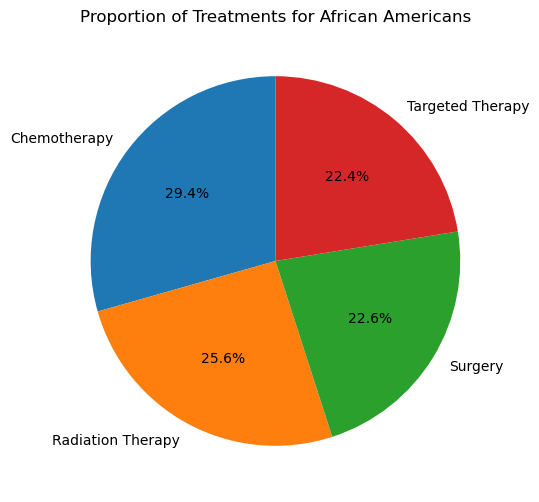

In [50]:
from task_c import plot_treatment_proportions

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    plot_treatment_proportions(df, ethnicity)
else:
    print("Invalid option!")

## C2

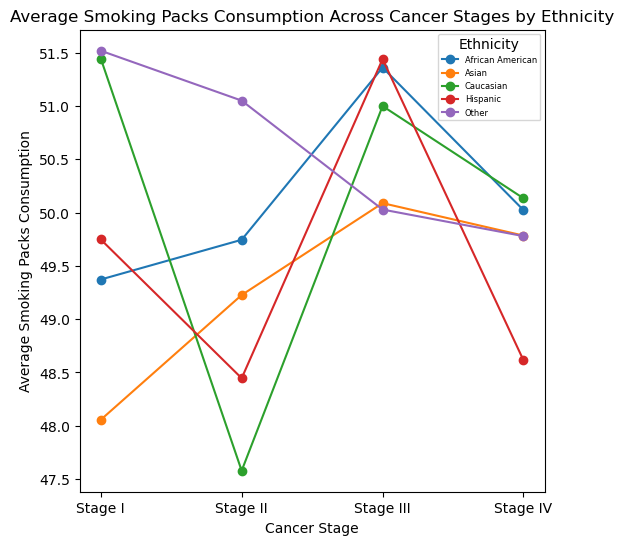

In [53]:
from task_c import plot_average_smoking_packs_consumption

plot_average_smoking_packs_consumption(df)

## C3

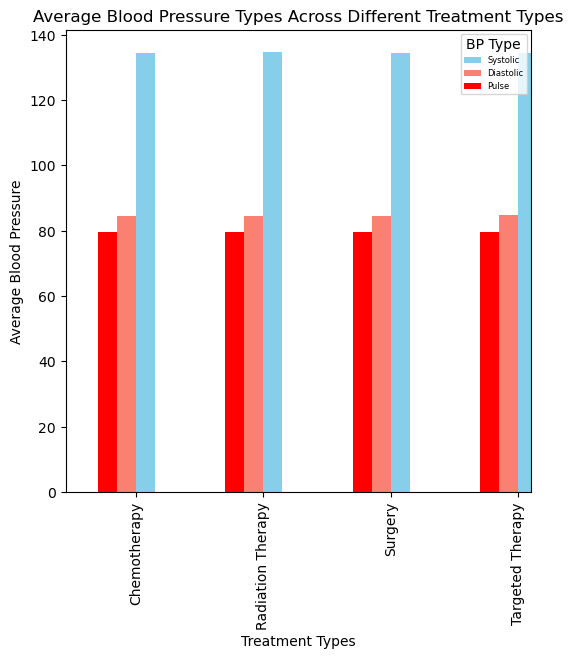

In [56]:
from task_c import plot_average_blood_pressure

plot_average_blood_pressure(df)

## C4

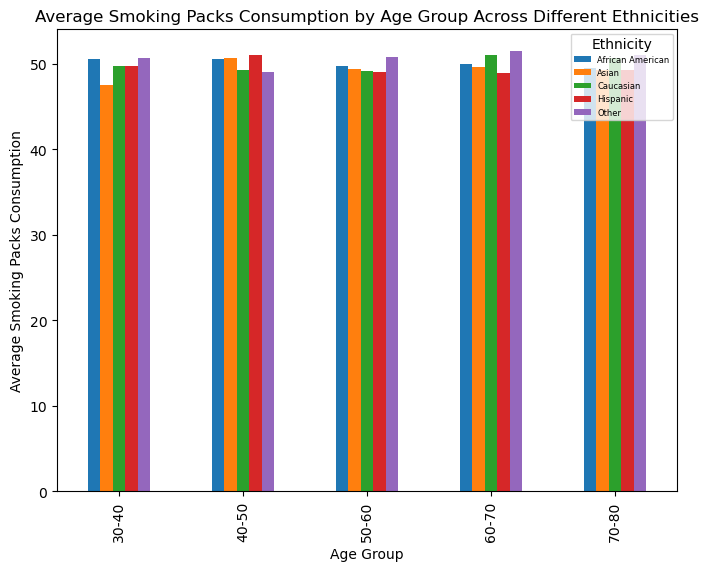

In [59]:
from task_c import plot_average_smoking_consumption_by_age_group

plot_average_smoking_consumption_by_age_group(df)
